In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import zipfile

Imported the Zipfile library to unzip the CSV files folder 


In [36]:
zf = zipfile. ZipFile('Uber_Data.zip')

namelist() is used to display all the csv Files present in that folder

In [35]:
zf.namelist()

['Uber Data/other-American_B01362.csv',
 'Uber Data/other-Carmel_B00256.csv',
 'Uber Data/other-Dial7_B00887.csv',
 'Uber Data/other-Diplo_B01196.csv',
 'Uber Data/other-Federal_02216.csv',
 'Uber Data/other-FHV-services_jan-aug-2015.csv',
 'Uber Data/other-Firstclass_B01536.csv',
 'Uber Data/other-Highclass_B01717.csv',
 'Uber Data/other-Lyft_B02510.csv',
 'Uber Data/other-Prestige_B01338.csv',
 'Uber Data/other-Skyline_B00111.csv',
 'Uber Data/Uber-Jan-Feb-FOIL.csv',
 'Uber Data/uber-raw-data-apr14.csv',
 'Uber Data/uber-raw-data-aug14.csv',
 'Uber Data/uber-raw-data-janjune-15.csv',
 'Uber Data/uber-raw-data-jul14.csv',
 'Uber Data/uber-raw-data-jun14.csv',
 'Uber Data/uber-raw-data-may14.csv',
 'Uber Data/uber-raw-data-sep14.csv']

Reading the CSV file

In [41]:
df=pd.read_csv(zf.open('Uber Data/uber-raw-data-jul14.csv'))

In [42]:
df

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
...,...,...,...,...
796116,7/31/2014 23:22:00,40.7285,-73.9846,B02764
796117,7/31/2014 23:23:00,40.7615,-73.9868,B02764
796118,7/31/2014 23:29:00,40.6770,-73.9515,B02764
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764


In [43]:
df.shape

(796121, 4)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


Checking wether the Null Values are present in the dataset or not

In [54]:
df.isnull().sum()

Date/Time       0
Lat             0
Lon             0
Base            0
DayOfWeekNum    0
MonthDayNum     0
HourOfDay       0
MinOfDay        0
Weekday         0
dtype: int64

In [79]:
df.dtypes

Date/Time       datetime64[ns]
Lat                    float64
Lon                    float64
Base                    object
DayOfWeekNum             int64
MonthDayNum              int64
HourOfDay                int64
MinOfDay                 int64
Weekday                 object
BinnedHour      datetime64[ns]
dtype: object

In [80]:
type(df.loc[0,'Date/Time'])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
import datetime as dt

In [53]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
df['DayOfWeekNum'] = df['Date/Time'].dt.dayofweek
df['Weekday'] = df['Date/Time'].dt.day_name()
df['MonthDayNum'] = df['Date/Time'].dt.day
df['HourOfDay'] = df['Date/Time'].dt.hour
df['MinOfDay'] = df['Date/Time'].dt.minute
df.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,MonthDayNum,HourOfDay,MinOfDay,Weekday
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,1,0,3,Tuesday
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,1,0,5,Tuesday
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,1,0,6,Tuesday
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,1,0,9,Tuesday
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,1,0,20,Tuesday


Visualizing the Journeys of Week Days

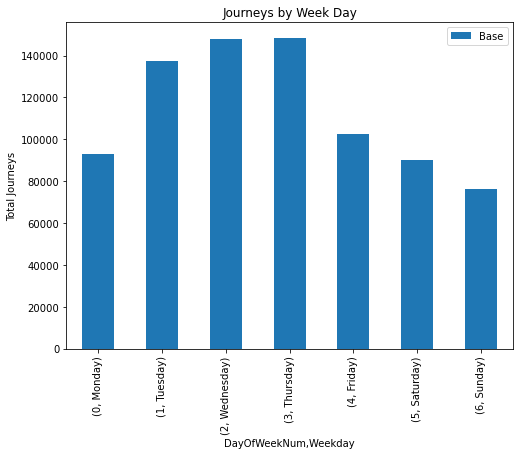

In [55]:
weekdays = df.pivot_table(index=['DayOfWeekNum','Weekday'],
                                  values='Base',
                                  aggfunc='count')
weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

Visualizing the Journeys of Month Days

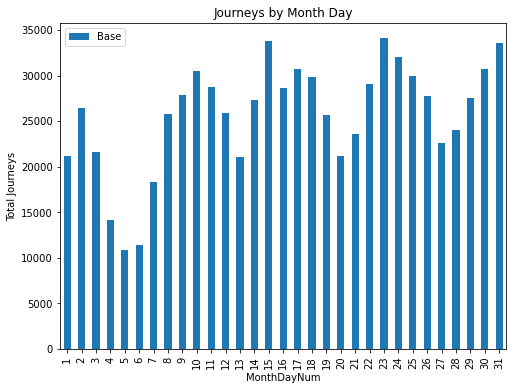

In [58]:
monthdays = df.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

Visualizing the Journeys of Hourly in a Day

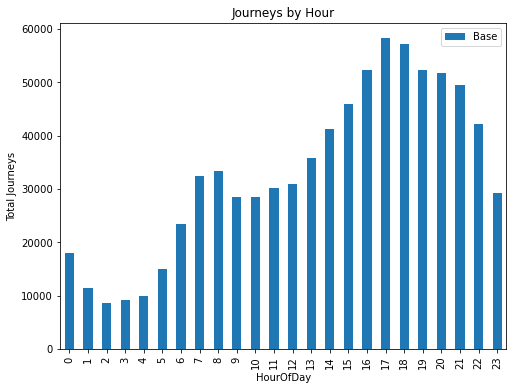

In [59]:
hour = df.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

<AxesSubplot:xlabel='HourOfDay'>

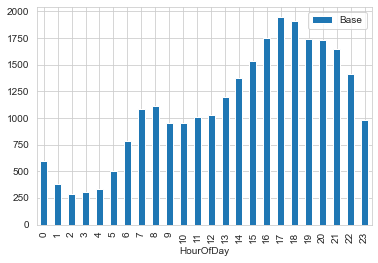

In [75]:
avgHours=hour/30
avgHours.plot(kind='bar')

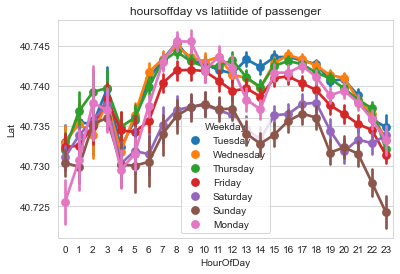

In [61]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="HourOfDay", y="Lat", hue="Weekday", data=df)
ax.set_title('hoursoffday vs latiitide of passenger')
plt.show()

In [64]:
df['BinnedHour']=df['Date/Time'].dt.floor('15min')
df

,Date/Time,Lat,Lon,Base,DayOfWeekNum,MonthDayNum,HourOfDay,MinOfDay,Weekday,BinnedHour
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,1,0,3,Tuesday,2014-07-01 00:00:00
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,1,0,5,Tuesday,2014-07-01 00:00:00
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,1,0,6,Tuesday,2014-07-01 00:00:00
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,1,0,9,Tuesday,2014-07-01 00:00:00
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,1,0,20,Tuesday,2014-07-01 00:15:00
...,...,...,...,...,...,...,...,...,...,...
796116,2014-07-31 23:22:00,40.7285,-73.9846,B02764,3,31,23,22,Thursday,2014-07-31 23:15:00
796117,2014-07-31 23:23:00,40.7615,-73.9868,B02764,3,31,23,23,Thursday,2014-07-31 23:15:00
796118,2014-07-31 23:29:00,40.6770,-73.9515,B02764,3,31,23,29,Thursday,2014-07-31 23:15:00
796119,2014-07-31 23:30:00,40.7225,-74.0038,B02764,3,31,23,30,Thursday,2014-07-31 23:30:00


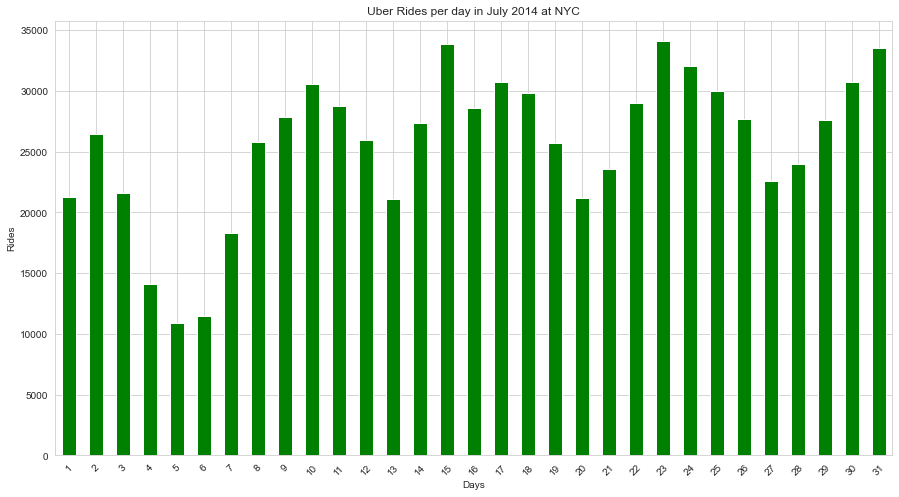

In [65]:
plt.figure(figsize=(15,8))
df['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='green')
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)
plt.title('Uber Rides per day in July 2014 at NYC')
plt.xlabel('Days')
_=plt.ylabel('Rides')

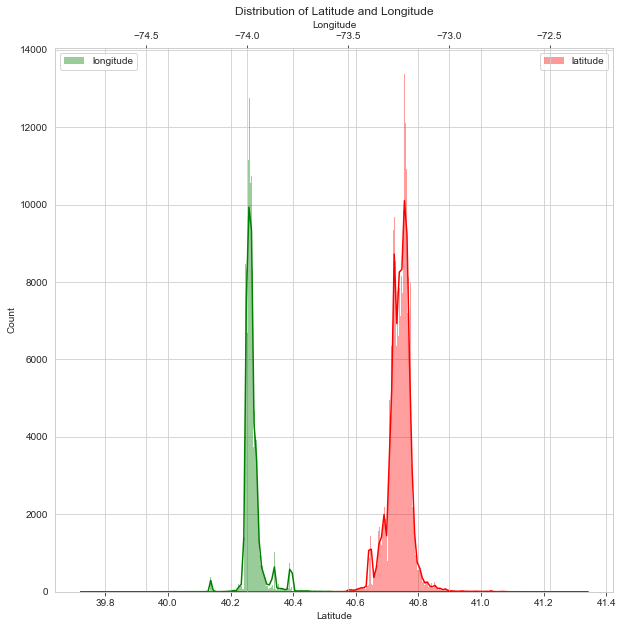

In [66]:
plt.figure(figsize=(10,10))
sns.histplot(df['Lat'], bins='auto',kde=True,color='r',alpha=0.4,label = 'latitude')
plt.legend(loc='upper right')
plt.xlabel('Latitude')
plt.twiny()
sns.histplot(df['Lon'], bins='auto',kde=True,color='g',alpha=0.4,label = 'longitude')
_=plt.legend(loc='upper left')
_=plt.xlabel('Longitude')
_=plt.title('Distribution of Latitude and Longitude')

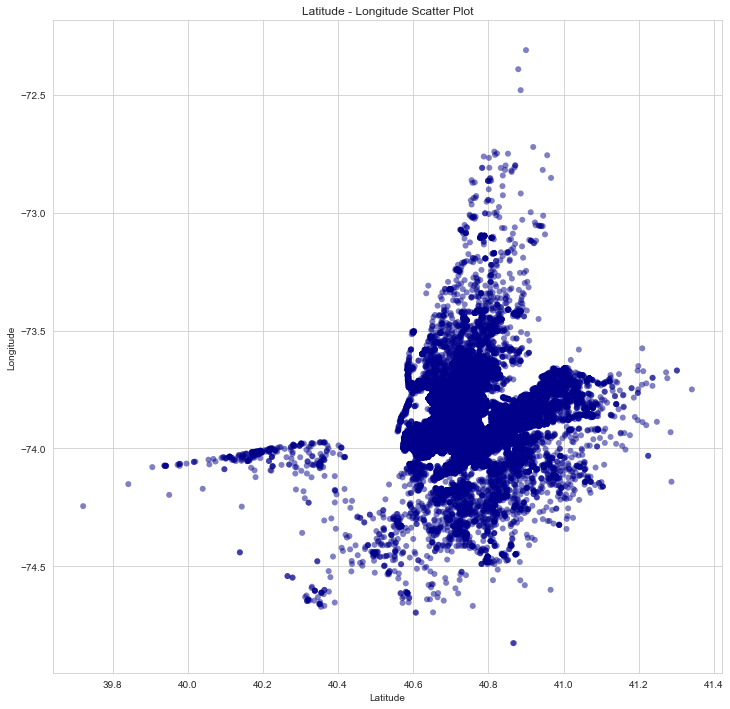

In [67]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Lat',y='Lon',data=df,edgecolor='None',alpha=0.5,color='darkblue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
_=plt.title('Latitude - Longitude Scatter Plot')

In [76]:
print(hour)

            Base
HourOfDay       
0          17953
1          11527
2           8562
3           9199
4          10040
5          14932
6          23456
7          32545
8          33387
9          28486
10         28558
11         30120
12         30900
13         35832
14         41357
15         46053
16         52403
17         58260
18         57268
19         52332
20         51859
21         49528
22         42218
23         29346
